In [51]:
import pandas as pd

In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

from scipy.stats import chi2_contingency

In [53]:
df_prepro = pd.read_csv('../datasets/Road Traffic Accidents/RTA Dataset.csv')

In [54]:
df_prepro

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


# Age band of drive

In [55]:
target_feature = 'Age_band_of_driver'
kolom_signifikan = []

for feature in df_prepro.columns:
    if feature != target_feature and df_prepro[feature].dtype == 'object': 
        tabel_kontingensi = pd.crosstab(df_prepro[target_feature], df_prepro[feature])
    
        chi2, p_value, dof, expected = chi2_contingency(tabel_kontingensi)
        
        if p_value < 0.05:
            kolom_signifikan.append(feature)

if kolom_signifikan:
    print(f"Kolom yang memiliki hubungan signifikan dengan '{target_feature}':")
    for kolom in kolom_signifikan:
        print(kolom)
else:
    print(f"Tidak ada kolom yang memiliki hubungan signifikan dengan '{target_feature}'.")


Kolom yang memiliki hubungan signifikan dengan 'Age_band_of_driver':
Time
Day_of_week
Sex_of_driver
Defect_of_vehicle
Types_of_Junction
Road_surface_conditions
Light_conditions
Weather_conditions
Type_of_collision
Sex_of_casualty
Accident_severity


In [56]:
print(df_prepro['Age_band_of_driver'].value_counts())
print(df_prepro['Age_band_of_driver'].isna().sum())

contingency_table = pd.crosstab(df_prepro['Age_band_of_driver'], df_prepro['Accident_severity'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")


if p < 0.05:
    print("Kesimpulan: Ada hubungan signifikan antara Road_allignment dan Accident_severity.")
else:
    print("Kesimpulan: Tidak ada hubungan signifikan antara Road_allignment dan Accident_severity.")


Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64
0
Accident_severity   Fatal injury  Serious Injury  Slight Injury
Age_band_of_driver                                             
18-30                         62             604           3605
31-50                         54             541           3492
Over 51                       24             257           1304
Under 18                      12             169            644
Unknown                        6             172           1370
Chi-Square: 60.52674160341546
P-Value: 3.673673192795839e-10
Kesimpulan: Ada hubungan signifikan antara Road_allignment dan Accident_severity.


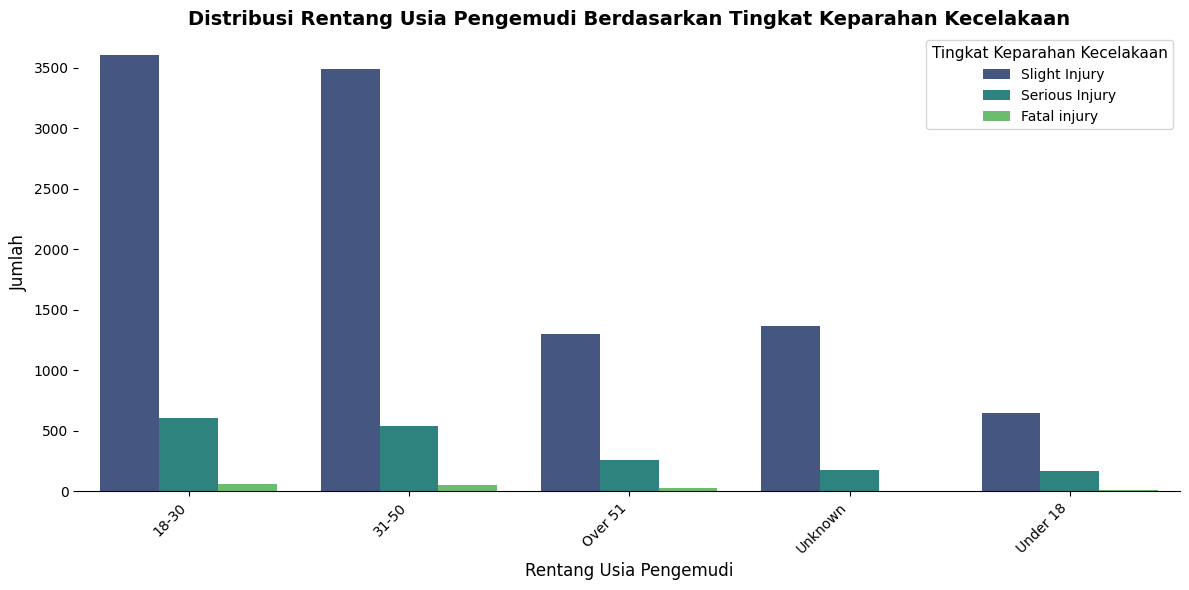

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))  
sns.countplot(data=df_prepro, x="Age_band_of_driver", hue="Accident_severity",
              order=df_prepro["Age_band_of_driver"].value_counts().index,
              palette="viridis")  

plt.xticks(rotation=45, ha='right') 
plt.xlabel("Rentang Usia Pengemudi", fontsize=12)  
plt.ylabel("Jumlah", fontsize=12)
plt.title("Distribusi Rentang Usia Pengemudi Berdasarkan Tingkat Keparahan Kecelakaan", fontsize=14, fontweight='bold')  
plt.legend(title="Tingkat Keparahan Kecelakaan", fontsize=10, title_fontsize=11)  
plt.tight_layout()  
sns.despine(left=True) 
plt.show()

In [58]:
# agebanddriver = {
#     "Under 18": "Remaja",
#     "18-30": "Dewasa",
#     "31-50": "Dewasa",
#     "Over 51": "Lansia",
#     "Unknown":"Unknwon"
# }

# df_prepro['Age_band_of_driver'] = df_prepro['Age_band_of_driver'].map(agebanddriver)

# Tye pf vehicle

In [59]:
target_feature = 'Type_of_vehicle'
kolom_signifikan = []

for feature in df_prepro.columns:
    if feature != target_feature and df_prepro[feature].dtype == 'object': 
        tabel_kontingensi = pd.crosstab(df_prepro[target_feature], df_prepro[feature])
    
        chi2, p_value, dof, expected = chi2_contingency(tabel_kontingensi)
        
        if p_value < 0.05:
            kolom_signifikan.append(feature)

if kolom_signifikan:
    print(f"Kolom yang memiliki hubungan signifikan dengan '{target_feature}':")
    for kolom in kolom_signifikan:
        print(kolom)
else:
    print(f"Tidak ada kolom yang memiliki hubungan signifikan dengan '{target_feature}'.")

if p < 0.05:
    print("Kesimpulan: Ada hubungan signifikan antara Road_allignment dan Accident_severity.")
else:
    print("Kesimpulan: Tidak ada hubungan signifikan antara Road_allignment dan Accident_severity.")


Kolom yang memiliki hubungan signifikan dengan 'Type_of_vehicle':
Time
Educational_level
Vehicle_driver_relation
Driving_experience
Owner_of_vehicle
Service_year_of_vehicle
Defect_of_vehicle
Area_accident_occured
Lanes_or_Medians
Road_allignment
Road_surface_type
Type_of_collision
Vehicle_movement
Work_of_casuality
Cause_of_accident
Kesimpulan: Ada hubungan signifikan antara Road_allignment dan Accident_severity.


In [60]:
print(df_prepro['Type_of_vehicle'].value_counts())
print(df_prepro['Type_of_vehicle'].isna().sum())

contingency_table = pd.crosstab(df_prepro['Type_of_vehicle'], df_prepro['Accident_severity'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("Kesimpulan: Ada hubungan signifikan antara Road_allignment dan Accident_severity.")
else:
    print("Kesimpulan: Tidak ada hubungan signifikan antara Road_allignment dan Accident_severity.")

Type_of_vehicle
Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: count, dtype: int64
950
Accident_severity     Fatal injury  Serious Injury  Slight Injury
Type_of_vehicle                                                  
Automobile                      40             472           2693
Bajaj                            0               3             26
Bicycle                          0               1             20
Long lorry                       4              67            312
Lorry (11?40Q)                   7              99            435

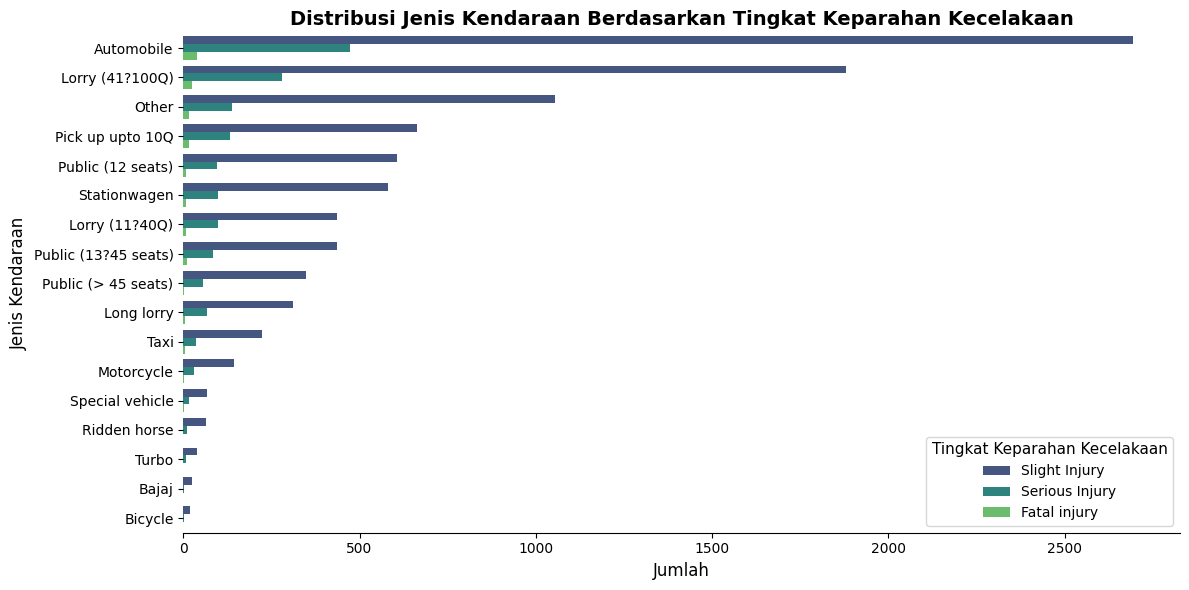

In [61]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_prepro, y="Type_of_vehicle", hue="Accident_severity", order=df_prepro["Type_of_vehicle"].value_counts().index, palette="viridis")
plt.xlabel("Jumlah", fontsize=12)
plt.ylabel("Jenis Kendaraan", fontsize=12)
plt.title("Distribusi Jenis Kendaraan Berdasarkan Tingkat Keparahan Kecelakaan", fontsize=14, fontweight='bold')
plt.legend(title="Tingkat Keparahan Kecelakaan", fontsize=10, title_fontsize=11)
plt.tight_layout()
sns.despine(left=True)
plt.show()

In [62]:
vehicle_mapping = {
    "Automobile": "Private Vehicle",
    "Stationwagen": "Private Vehicle",
    "Taxi": "Public Transport",

    "Pick up upto 10Q": "Commercial Vehicle",
    "Lorry (11?40Q)": "Commercial Vehicle",
    "Lorry (41?100Q)": "Commercial Vehicle",
    "Long lorry": "Commercial Vehicle",

    "Public (12 seats)": "Public Transport",
    "Public (13?45 seats)": "Public Transport",
    "Public (> 45 seats)": "Public Transport",

    "Motorcycle": "Private Vehicle",
    "Bicycle": "Non-Motorized",
    "Bajaj": "Public Transport",

    "Special vehicle": "Special Vehicle",
    "Ridden horse": "Non-Motorized",
    "Turbo": "Special Vehicle",
    "Other": "Other"
}

df_prepro['Type_of_vehicle'] = df_prepro['Type_of_vehicle'].map(vehicle_mapping)

df_prepro['Type_of_vehicle'].fillna(df_prepro['Type_of_vehicle'].mode()[0], inplace=True)


/tmp/ipykernel_7331/4097344508.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prepro['Type_of_vehicle'].fillna(df_prepro['Type_of_vehicle'].mode()[0], inplace=True)


# Lanes_or_Medians	

In [63]:
target_feature = 'Lanes_or_Medians'
kolom_signifikan = []

for feature in df_prepro.columns:
    if feature != target_feature and df_prepro[feature].dtype == 'object': 
        tabel_kontingensi = pd.crosstab(df_prepro[target_feature], df_prepro[feature])
    
        chi2, p_value, dof, expected = chi2_contingency(tabel_kontingensi)
        
        if p_value < 0.05:
            kolom_signifikan.append(feature)

if kolom_signifikan:
    print(f"Kolom yang memiliki hubungan signifikan dengan '{target_feature}':")
    for kolom in kolom_signifikan:
        print(kolom)
else:
    print(f"Tidak ada kolom yang memiliki hubungan signifikan dengan '{target_feature}'.")


Kolom yang memiliki hubungan signifikan dengan 'Lanes_or_Medians':
Time
Educational_level
Vehicle_driver_relation
Driving_experience
Type_of_vehicle
Owner_of_vehicle
Service_year_of_vehicle
Defect_of_vehicle
Area_accident_occured
Road_allignment
Road_surface_type
Type_of_collision
Vehicle_movement
Work_of_casuality


In [64]:
print(df_prepro['Lanes_or_Medians'].value_counts())
print(df_prepro['Lanes_or_Medians'].isna().sum())

contingency_table = pd.crosstab(df_prepro['Lanes_or_Medians'], df_prepro['Accident_severity'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("Kesimpulan: Ada hubungan signifikan antara Road_allignment dan Accident_severity.")
else:
    print("Kesimpulan: Tidak ada hubungan signifikan antara Road_allignment dan Accident_severity.")

Lanes_or_Medians
Two-way (divided with broken lines road marking)    4411
Undivided Two way                                   3796
other                                               1660
Double carriageway (median)                         1020
One way                                              845
Two-way (divided with solid lines road marking)      142
Unknown                                               57
Name: count, dtype: int64
385
Accident_severity                                 Fatal injury  \
Lanes_or_Medians                                                 
Double carriageway (median)                                  7   
One way                                                     12   
Two-way (divided with broken lines road marking)            49   
Two-way (divided with solid lines road marking)              1   
Undivided Two way                                           62   
Unknown                                                      0   
other                     

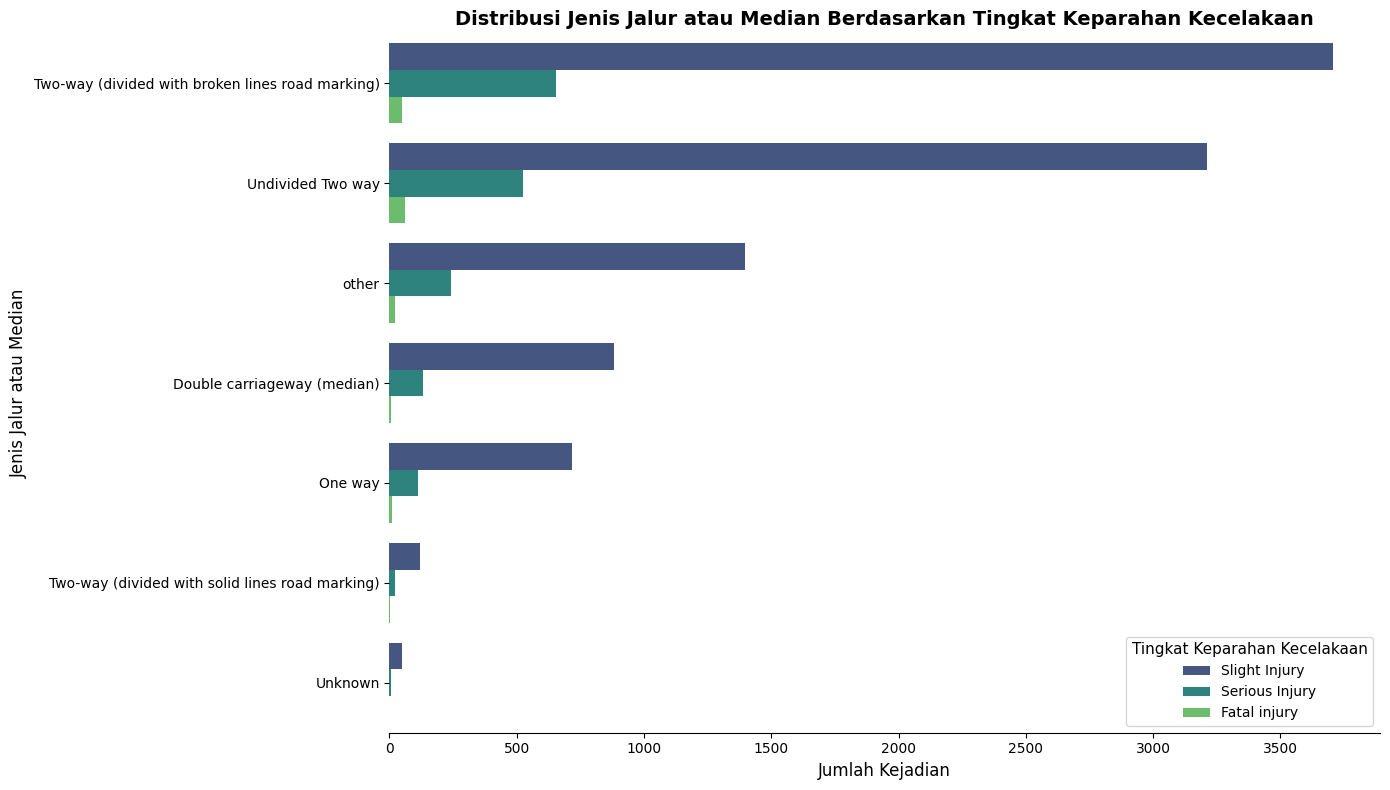

In [65]:
plt.figure(figsize=(14, 8))  
sns.countplot(data=df_prepro, y="Lanes_or_Medians", hue="Accident_severity",
              order=df_prepro["Lanes_or_Medians"].value_counts().index,
              palette="viridis") 

plt.xlabel("Jumlah Kejadian", fontsize=12) 
plt.ylabel("Jenis Jalur atau Median", fontsize=12)
plt.title("Distribusi Jenis Jalur atau Median Berdasarkan Tingkat Keparahan Kecelakaan",
          fontsize=14, fontweight='bold')  
plt.legend(title="Tingkat Keparahan Kecelakaan", fontsize=10, title_fontsize=11)  
plt.tight_layout() 
sns.despine(left=True) 
plt.show()

In [66]:
df_prepro['Lanes_or_Medians'].fillna(df_prepro['Lanes_or_Medians'].mode()[0], inplace=True)

# lanes_mapping = {
#     "Two-way (divided with solid lines road)": "Divided Road (Solid Lines)",
#     "Two-way (divided with broken lines road)": "Divided Road (Broken Lines)",
#     "Double carriageway (median)": "Divided Road (Median)",
#     "One way": "One Way",
#     "Two-way (without central median)": "Two-way (No Median)",
#     "Other": "Other"
# }


# df_prepro["Lanes_or_Medians"] = df_prepro["Lanes_or_Medians"].map(lanes_mapping)

/tmp/ipykernel_7331/1326676649.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prepro['Lanes_or_Medians'].fillna(df_prepro['Lanes_or_Medians'].mode()[0], inplace=True)


In [67]:
df_prepro['Lanes_or_Medians'].value_counts()

Lanes_or_Medians
Two-way (divided with broken lines road marking)    4796
Undivided Two way                                   3796
other                                               1660
Double carriageway (median)                         1020
One way                                              845
Two-way (divided with solid lines road marking)      142
Unknown                                               57
Name: count, dtype: int64

# Road_allignment

In [68]:
print(df_prepro['Road_allignment'].value_counts())
print(df_prepro['Road_allignment'].isna().sum())

contingency_table = pd.crosstab(df_prepro['Road_allignment'], df_prepro['Accident_severity'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("Kesimpulan: Ada hubungan signifikan antara Road_allignment dan Accident_severity.")
else:
    print("Kesimpulan: Tidak ada hubungan signifikan antara Road_allignment dan Accident_severity.")

Road_allignment
Tangent road with flat terrain                   10459
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: count, dtype: int64
142
Accident_severity                              Fatal injury  Serious Injury  \
Road_allignment                                                               
Escarpments                                               1              14   
Gentle horizontal curve                                   3              20   
Sharp reverse curve                                       0               9   
Steep grade downward with mountainous terrain             4     

In [69]:

df_prepro["Road_allignment"].fillna(df_prepro["Road_allignment"].mode()[0], inplace=True)


/tmp/ipykernel_7331/1421100390.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prepro["Road_allignment"].fillna(df_prepro["Road_allignment"].mode()[0], inplace=True)


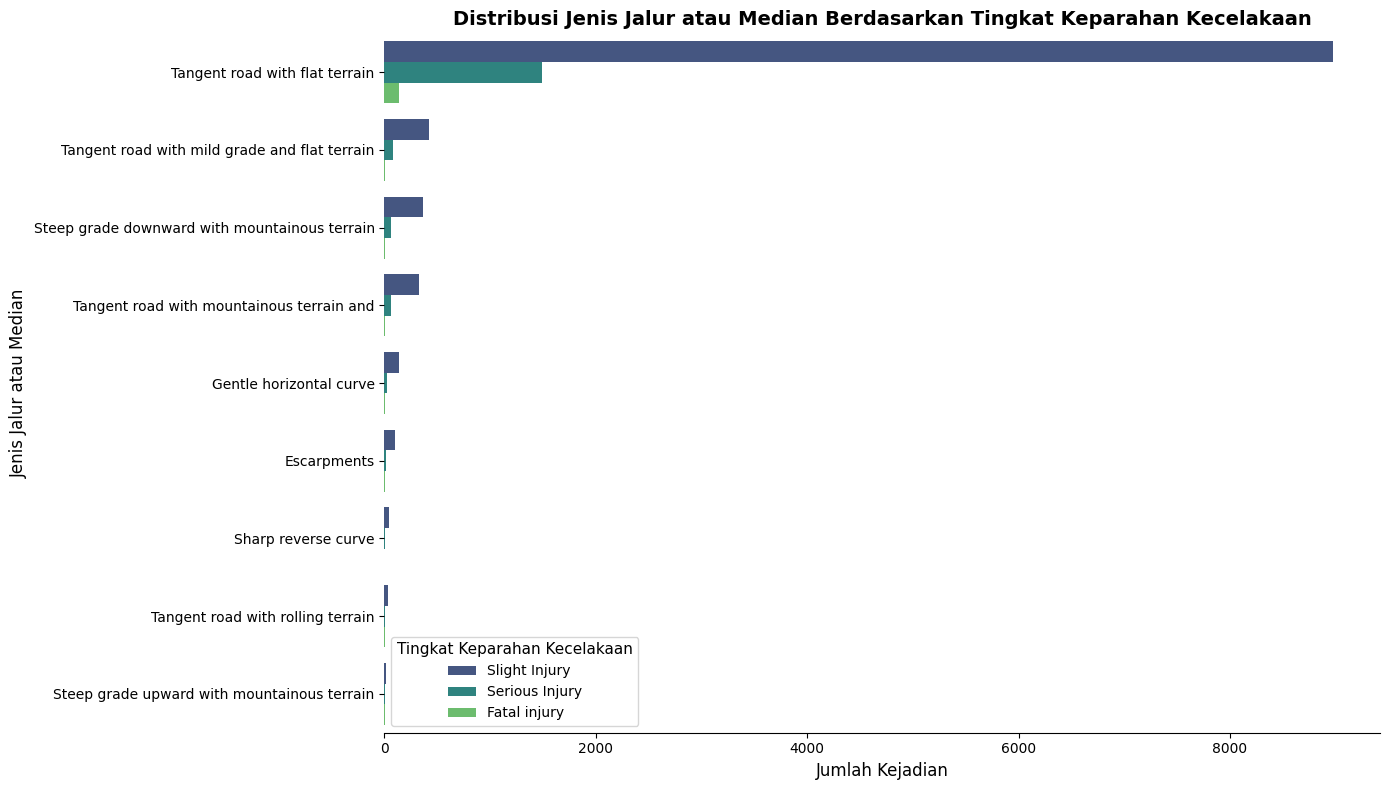

In [70]:
plt.figure(figsize=(14, 8))  
sns.countplot(data=df_prepro, y="Road_allignment", hue="Accident_severity",
              order=df_prepro["Road_allignment"].value_counts().index,
              palette="viridis") 

plt.xlabel("Jumlah Kejadian", fontsize=12) 
plt.ylabel("Jenis Jalur atau Median", fontsize=12)
plt.title("Distribusi Jenis Jalur atau Median Berdasarkan Tingkat Keparahan Kecelakaan",
          fontsize=14, fontweight='bold')  
plt.legend(title="Tingkat Keparahan Kecelakaan", fontsize=10, title_fontsize=11)  
plt.tight_layout() 
sns.despine(left=True) 
plt.show()

In [71]:

# road_mapping = {
#     "Tangent road with flat terrain": "Straight",
#     "Tangent road with mild grade and flat terrain": "Straight",
#     "Tangent road with rolling terrain": "Straight",
#     "Gentle horizontal curve": "Curved",
#     "Sharp reverse curve": "Curved",
#     "Steep grade upward with mountainous terrain": "Mountainous",
#     "Steep grade downward with mountainous terrain": "Mountainous",
#     "Tangent road with mountainous terrain": "Mountainous"
# }

# df_prepro["Road_allignment"] = df_prepro["Road_allignment"].map(road_mapping)

# Types_of_Junction

In [72]:
print(df_prepro['Types_of_Junction'].value_counts())
print(df_prepro['Types_of_Junction'].isna().sum())

contingency_table = pd.crosstab(df_prepro['Types_of_Junction'], df_prepro['Accident_severity'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("Kesimpulan: Ada hubungan signifikan antara Types_of_Junction dan Accident_severity.")
else:
    print("Kesimpulan: Tidak ada hubungan signifikan antara Types_of_Junction dan Accident_severity.")


Types_of_Junction
Y Shape        4543
No junction    3837
Crossing       2177
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: count, dtype: int64
887
Accident_severity  Fatal injury  Serious Injury  Slight Injury
Types_of_Junction                                             
Crossing                     12             245           1920
No junction                  71             581           3185
O Shape                       1              26            137
Other                         2              83            360
T Shape                       0               7             53
Unknown                       2              26            163
X Shape                       0               0             12
Y Shape                      53             633           3857
Chi-Square: 54.074638895236916
P-Value: 1.247409989761098e-06
Kesimpulan: Ada hubungan signifikan antara Types_of_Junction dan Accident_severity.


/tmp/ipykernel_7331/4142900542.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_prepro["Types_of_Junction"], palette="magma", order=df_prepro["Types_of_Junction"].value_counts().index)


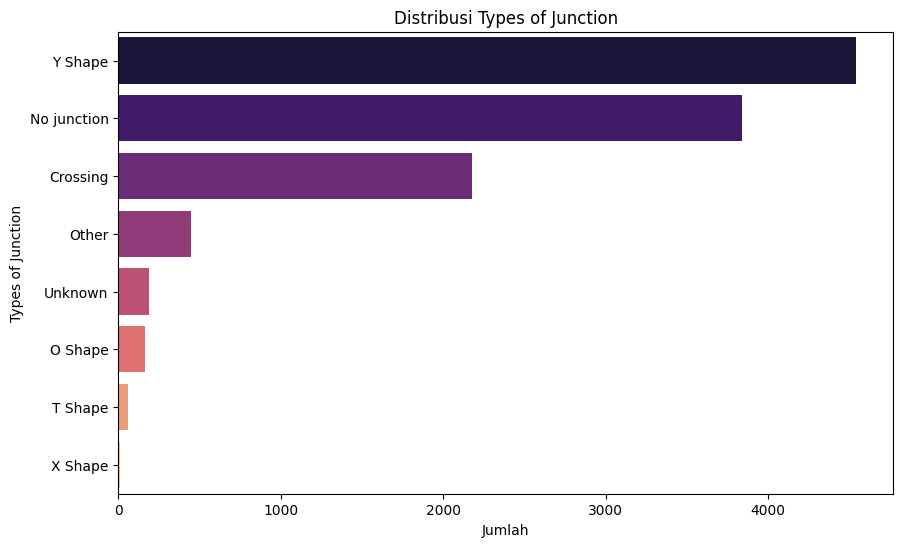

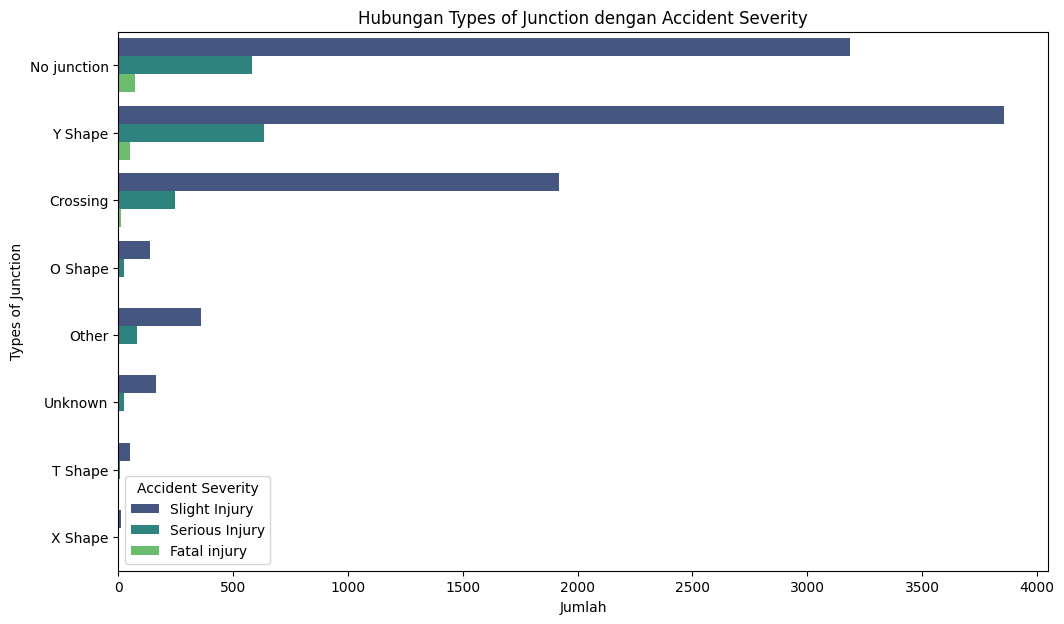

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df_prepro["Types_of_Junction"], palette="magma", order=df_prepro["Types_of_Junction"].value_counts().index)
plt.title("Distribusi Types of Junction")
plt.xlabel("Jumlah")
plt.ylabel("Types of Junction")
plt.show()

plt.figure(figsize=(12, 7))
sns.countplot(y=df_prepro["Types_of_Junction"], hue=df_prepro["Accident_severity"], palette="viridis")
plt.title("Hubungan Types of Junction dengan Accident Severity")
plt.xlabel("Jumlah")
plt.ylabel("Types of Junction")
plt.legend(title="Accident Severity")
plt.show()


In [74]:
df_prepro["Types_of_Junction"].fillna(df_prepro["Types_of_Junction"].mode()[0], inplace=True)
df_prepro["Types_of_Junction"].isnull().sum()


/tmp/ipykernel_7331/3668770450.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prepro["Types_of_Junction"].fillna(df_prepro["Types_of_Junction"].mode()[0], inplace=True)


np.int64(0)

# Road_surface_type

In [75]:
print(df_prepro['Road_surface_conditions'].value_counts())
print(df_prepro['Road_surface_conditions'].isna().sum())

contingency_table = pd.crosstab(df_prepro['Road_surface_conditions'], df_prepro['Accident_severity'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("Kesimpulan: Ada hubungan signifikan antara Road_surface_conditions dan Accident_severity.")
else:
    print("Kesimpulan: Tidak ada hubungan signifikan antara Road_surface_conditions dan Accident_severity.")


Road_surface_conditions
Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: count, dtype: int64
0
Accident_severity        Fatal injury  Serious Injury  Slight Injury
Road_surface_conditions                                             
Dry                               121            1332           7887
Flood over 3cm. deep                0               0              2
Snow                                0               4             66
Wet or damp                        37             407           2460
Chi-Square: 5.720857760632065
P-Value: 0.4551747454425168
Kesimpulan: Tidak ada hubungan signifikan antara Road_surface_conditions dan Accident_severity.


/tmp/ipykernel_7331/2551622008.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_prepro["Road_surface_conditions"], palette="magma", order=df_prepro["Road_surface_conditions"].value_counts().index)


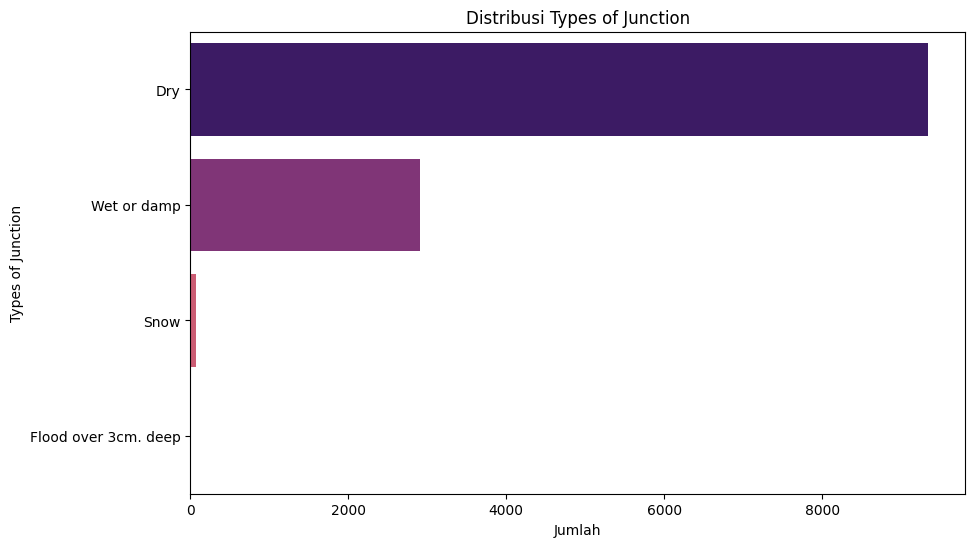

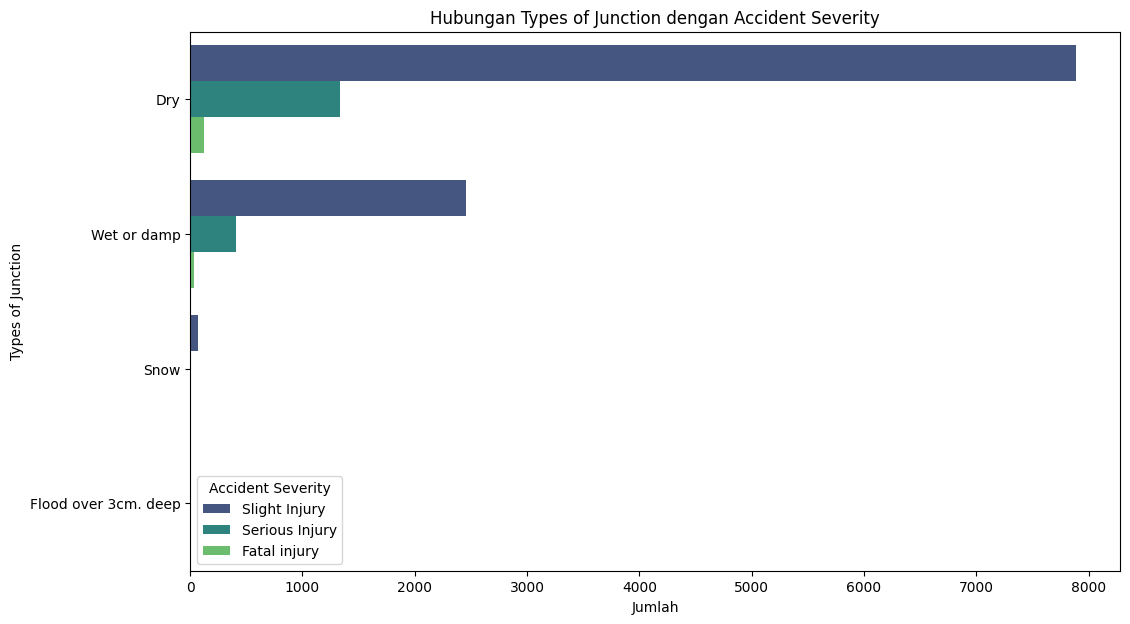

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df_prepro["Road_surface_conditions"], palette="magma", order=df_prepro["Road_surface_conditions"].value_counts().index)
plt.title("Distribusi Types of Junction")
plt.xlabel("Jumlah")
plt.ylabel("Types of Junction")
plt.show()

plt.figure(figsize=(12, 7))
sns.countplot(y=df_prepro["Road_surface_conditions"], hue=df_prepro["Accident_severity"], palette="viridis")
plt.title("Hubungan Types of Junction dengan Accident Severity")
plt.xlabel("Jumlah")
plt.ylabel("Types of Junction")
plt.legend(title="Accident Severity")
plt.show()


# Number_of_vehicles_involved

In [77]:
print(df_prepro['Number_of_vehicles_involved'].value_counts())
print(df_prepro['Number_of_vehicles_involved'].isna().sum())

contingency_table = pd.crosstab(df_prepro['Number_of_vehicles_involved'], df_prepro['Accident_severity'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("Kesimpulan: Ada hubungan signifikan antara Number_of_vehicles_involved dan Accident_severity.")
else:
    print("Kesimpulan: Tidak ada hubungan signifikan antara Number_of_vehicles_involved dan Accident_severity.")


# 

Number_of_vehicles_involved
2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: count, dtype: int64
0
Accident_severity            Fatal injury  Serious Injury  Slight Injury
Number_of_vehicles_involved                                             
1                                      43             519           1434
2                                     104             963           7273
3                                      11             210           1347
4                                       0              39            324
6                                       0              12             30
7                                       0               0              7
Chi-Square: 317.5489232885717
P-Value: 3.0133430176891622e-62
Kesimpulan: Ada hubungan signifikan antara Number_of_vehicles_involved dan Accident_severity.


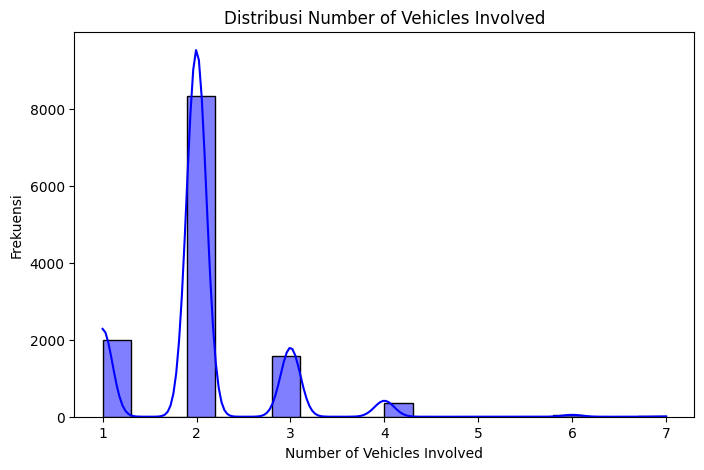

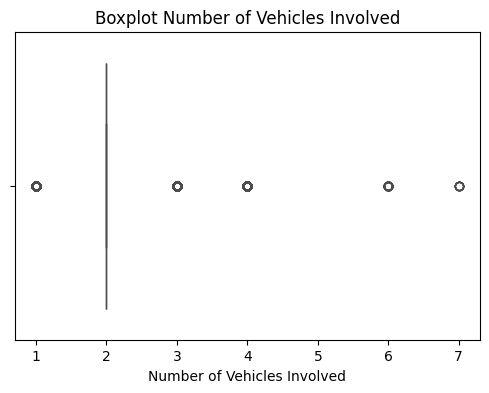

/tmp/ipykernel_7331/1633711288.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_prepro["Accident_severity"], y=df_prepro["Number_of_vehicles_involved"], palette="coolwarm")


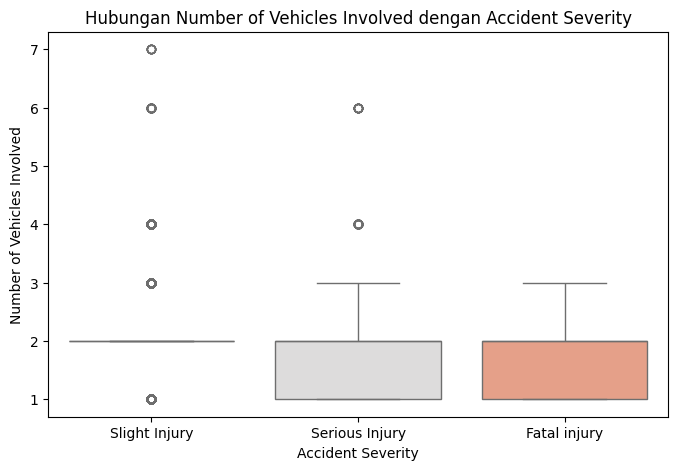

In [78]:
plt.figure(figsize=(8,5))
sns.histplot(df_prepro["Number_of_vehicles_involved"], bins=20, kde=True, color="blue")
plt.title("Distribusi Number of Vehicles Involved")
plt.xlabel("Number of Vehicles Involved")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df_prepro["Number_of_vehicles_involved"], color="red")
plt.title("Boxplot Number of Vehicles Involved")
plt.xlabel("Number of Vehicles Involved")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df_prepro["Accident_severity"], y=df_prepro["Number_of_vehicles_involved"], palette="coolwarm")
plt.title("Hubungan Number of Vehicles Involved dengan Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Number of Vehicles Involved")
plt.show()



In [79]:
# df_prepro["Number_of_vehicles_involved_log"] = np.log1p(df_prepro["Number_of_vehicles_involved"])

# plt.figure(figsize=(8,5))
# sns.histplot(df_prepro["Number_of_vehicles_involved_log"], bins=20, kde=True, color="green")
# plt.title("Distribusi Number of Vehicles Involved (Setelah Log Transformasi)")
# plt.xlabel("Log(1 + Number of Vehicles Involved)")
# plt.ylabel("Frekuensi")
# plt.show()


/tmp/ipykernel_7331/972765699.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_7331/972765699.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_7331/972765699.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_7331/972765699.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)


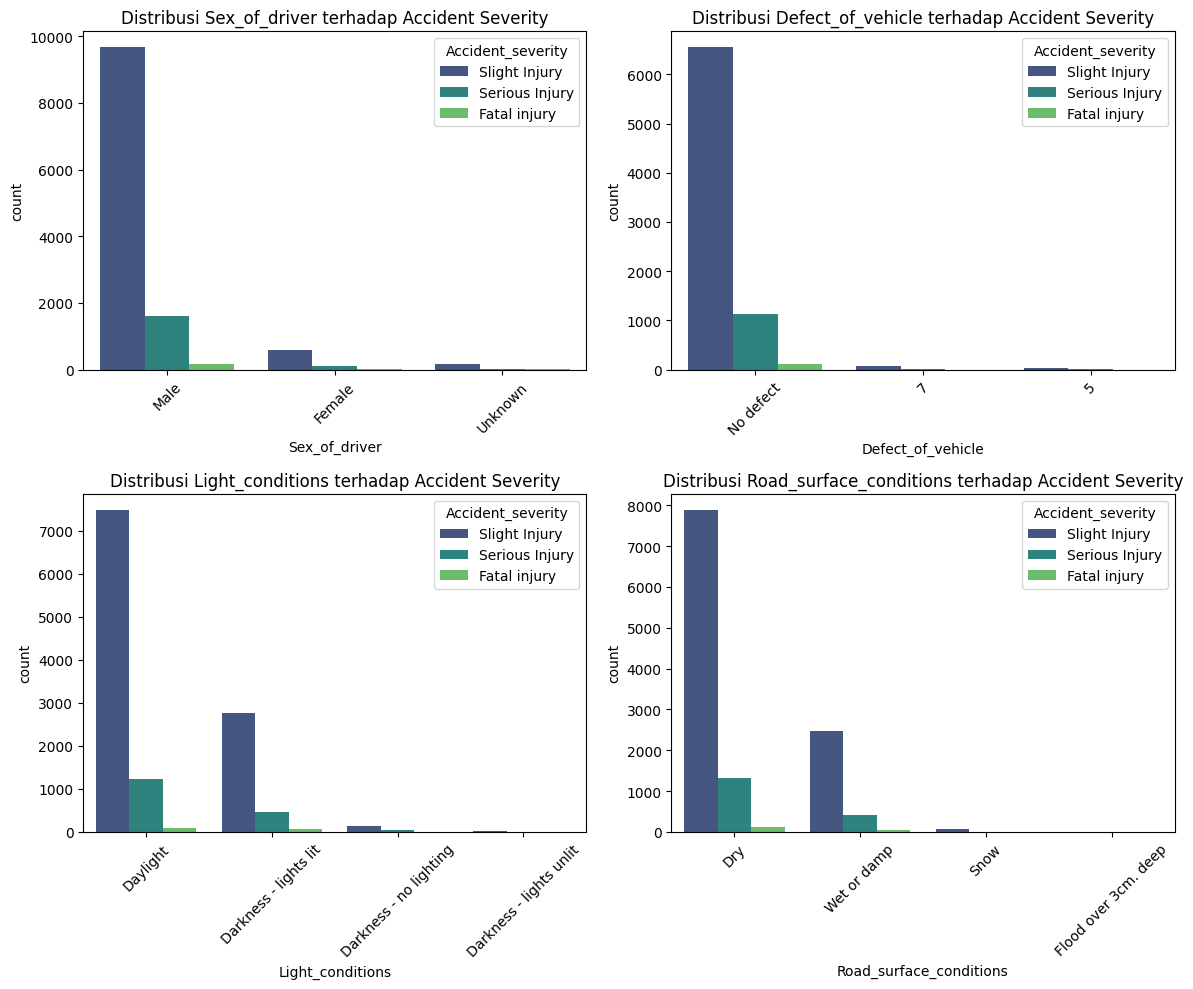

In [80]:
categorical_features = ["Sex_of_driver", "Defect_of_vehicle", "Light_conditions", "Road_surface_conditions"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=df_prepro[col], hue=df_prepro
                  ["Accident_severity"], palette="viridis", ax=axes[i])
    axes[i].set_title(f"Distribusi {col} terhadap Accident Severity")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


# Number_of_casualties

In [81]:


print(df_prepro['Number_of_casualties'].value_counts())
print(df_prepro['Number_of_casualties'].isna().sum())

contingency_table = pd.crosstab(df_prepro['Number_of_casualties'], df_prepro['Accident_severity'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("Kesimpulan: Ada hubungan signifikan antara Number_of_casualties dan Accident_severity.")
else:
    print("Kesimpulan: Tidak ada hubungan signifikan antara Number_of_casualties dan Accident_severity.")


# 

Number_of_casualties
1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: count, dtype: int64
0
Accident_severity     Fatal injury  Serious Injury  Slight Injury
Number_of_casualties                                             
1                               68            1222           7107
2                               24             300           1966
3                               16             116            777
4                               44              46            304
5                                6              32            169
6                                0              27             62
7                                0               0             22
8                                0               0              8
Chi-Square: 356.2134259778075
P-Value: 2.0454183587168176e-67
Kesimpulan: Ada hubungan signifikan antara Number_of_casualties dan Accident_severity.


In [82]:
# plt.figure(figsize=(8,5))
# sns.histplot(df_prepro["Number_of_casualties"], bins=20, kde=True, color="purple")
# plt.title("Distribusi Number of Casualties")
# plt.xlabel("Number of Casualties")
# plt.ylabel("Frekuensi")
# plt.show()

# plt.figure(figsize=(6,4))
# sns.boxplot(x=df_prepro["Number_of_casualties"], color="orange")
# plt.title("Boxplot Number of Casualties")
# plt.xlabel("Number of Casualties")
# plt.show()

# plt.figure(figsize=(8,5))
# sns.boxplot(x=df_prepro["Accident_severity"], y=df_prepro["Number_of_casualties"], palette="magma")
# plt.title("Hubungan Number of Casualties dengan Accident Severity")
# plt.xlabel("Accident Severity")
# plt.ylabel("Number of Casualties")
# plt.show()



In [83]:
# df_prepro["Number_of_casualties_log"] = np.log1p(df_prepro["Number_of_casualties"])

# plt.figure(figsize=(8,5))
# sns.histplot(df_prepro["Number_of_casualties_log"], bins=20, kde=True, color="green")
# plt.title("Distribusi Number of Casualties (Setelah Log Transformasi)")
# plt.xlabel("Log(1 + Number of Casualties)")
# plt.ylabel("Frekuensi")
# plt.show()


/tmp/ipykernel_7331/452196954.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_prepro[feature], palette=color, ax=ax, order=df_prepro[feature].value_counts().index)
/tmp/ipykernel_7331/452196954.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_7331/452196954.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_prepro[feature], palette=color, ax=ax, order=df_prepro[feature].value_counts().index)
/tmp/ipykernel_7331/452196954.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of tic

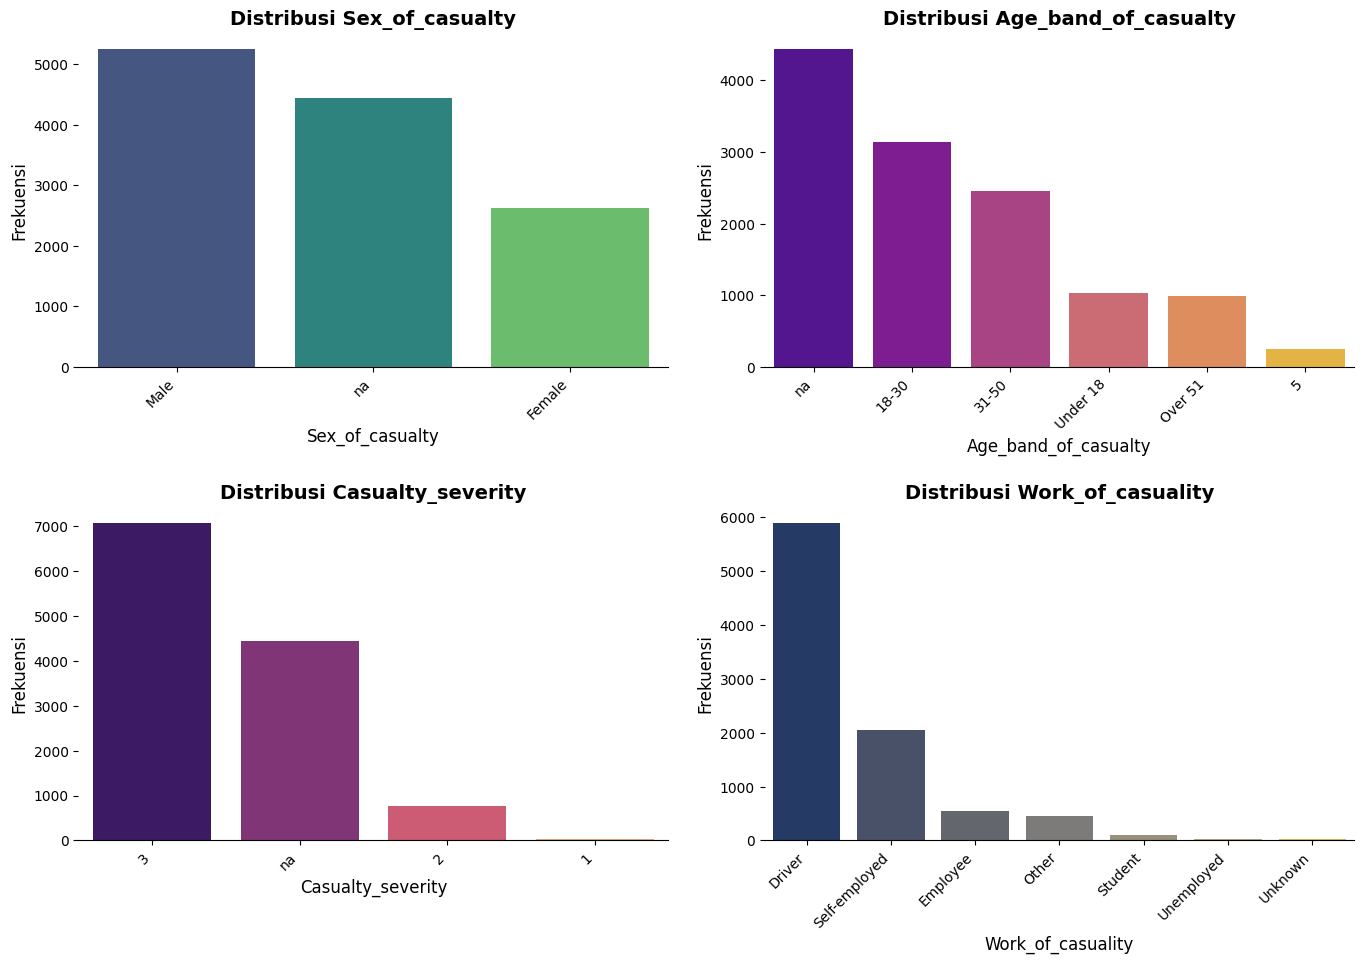

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

categorical_features = ["Sex_of_casualty", "Age_band_of_casualty", "Casualty_severity", "Work_of_casuality"]
colors = ["viridis", "plasma", "magma", "cividis"]

for ax, feature, color in zip(axes.flatten(), categorical_features, colors):
    sns.countplot(x=df_prepro[feature], palette=color, ax=ax, order=df_prepro[feature].value_counts().index)
    ax.set_title(f"Distribusi {feature}", fontsize=14, fontweight='bold')
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("Frekuensi", fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    sns.despine(ax=ax, left=True)

plt.tight_layout(pad=2.0)
plt.show()

In [85]:

categorical_features = ["Sex_of_casualty", "Age_band_of_casualty", "Casualty_severity", "Work_of_casuality"]
for feature in categorical_features:
    print(f"\nAnalisis untuk fitur: {feature}")
    
    print(df_prepro[feature].value_counts())
    

    print(f"Missing Values: {df_prepro[feature].isna().sum()}")
    

    contingency_table = pd.crosstab(df_prepro[feature], df_prepro["Accident_severity"])
    print("\nTabel Kontingensi:")
    print(contingency_table)
    

    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square: {chi2}")
    print(f"P-Value: {p}")
    

    if p < 0.05:
        print("Kesimpulan: Ada hubungan signifikan antara", feature, "dan Accident_severity.")
    else:
        print("Kesimpulan: Tidak ada hubungan signifikan antara", feature, "dan Accident_severity.")



Analisis untuk fitur: Sex_of_casualty
Sex_of_casualty
Male      5253
na        4443
Female    2620
Name: count, dtype: int64
Missing Values: 0

Tabel Kontingensi:
Accident_severity  Fatal injury  Serious Injury  Slight Injury
Sex_of_casualty                                               
Female                       29             361           2230
Male                         81             768           4404
na                           48             614           3781

Chi-Square: 6.793454941698799
P-Value: 0.14721414798543986
Kesimpulan: Tidak ada hubungan signifikan antara Sex_of_casualty dan Accident_severity.

Analisis untuk fitur: Age_band_of_casualty
Age_band_of_casualty
na          4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: count, dtype: int64
Missing Values: 0

Tabel Kontingensi:
Accident_severity     Fatal injury  Serious Injury  Slight Injury
Age_band_of_casualty                                             
18-30     

In [86]:
# import numpy as np

# for feature in categorical_features:
#     mode_value = df_prepro[feature].mode()[0]  # Ambil modus
    
#     # Pastikan semua nilai dalam kolom adalah string dan hilangkan spasi ekstra
#     df_prepro[feature] = df_prepro[feature].astype(str).str.strip()
    
#     # Ganti semua bentuk "na", "NaN", "N/A", "", atau nilai aneh lain dengan modus
#     df_prepro[feature] = df_prepro[feature].replace(
#         to_replace=r'^\s*$|(?i)\b(na|nan|n/a|none|null)\b', value=mode_value, regex=True
#     )
    
#     # Isi nilai NaN yang asli dengan modus
#     df_prepro[feature].replace({np.nan: mode_value}, inplace=True)

# # Cek apakah masih ada missing values
# print(df_prepro[categorical_features].isnull().sum())


In [87]:
df_prepro["Age_band_of_casualty"] = df_prepro["Age_band_of_casualty"].astype(str).str.strip()

mode_value = df_prepro.loc[df_prepro["Age_band_of_casualty"] != "na", "Age_band_of_casualty"].mode()[0]

df_prepro["Age_band_of_casualty"] = df_prepro["Age_band_of_casualty"].replace("na", mode_value)

print(df_prepro["Age_band_of_casualty"].value_counts())


Age_band_of_casualty
18-30       7588
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: count, dtype: int64


In [88]:
print(df_prepro["Age_band_of_casualty"].dtype)  
print(df_prepro["Age_band_of_casualty"].unique()) 


object
['18-30' '31-50' 'Under 18' 'Over 51' '5']


# Pedestrian

In [89]:
print(df_prepro['Pedestrian_movement'].value_counts())
print(df_prepro['Pedestrian_movement'].isna().sum())

contingency_table = pd.crosstab(df_prepro['Pedestrian_movement'], df_prepro['Accident_severity'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("Kesimpulan: Ada hubungan signifikan antara Pedestrian_movement dan Accident_severity.")
else:
    print("Kesimpulan: Tidak ada hubungan signifikan antara Pedestrian_movement dan Accident_severity.")


Pedestrian_movement
Not a Pedestrian                                                                                                                         11390
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle                                                              337
Unknown or other                                                                                                                           293
Crossing from driver's nearside                                                                                                            140
Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle                                                               72
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)                                                              46
Walking along in carriageway, back to traffic                                                                             

/tmp/ipykernel_7331/3109768154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_prepro["Pedestrian_movement"], palette="magma", order=df_prepro["Pedestrian_movement"].value_counts().index)


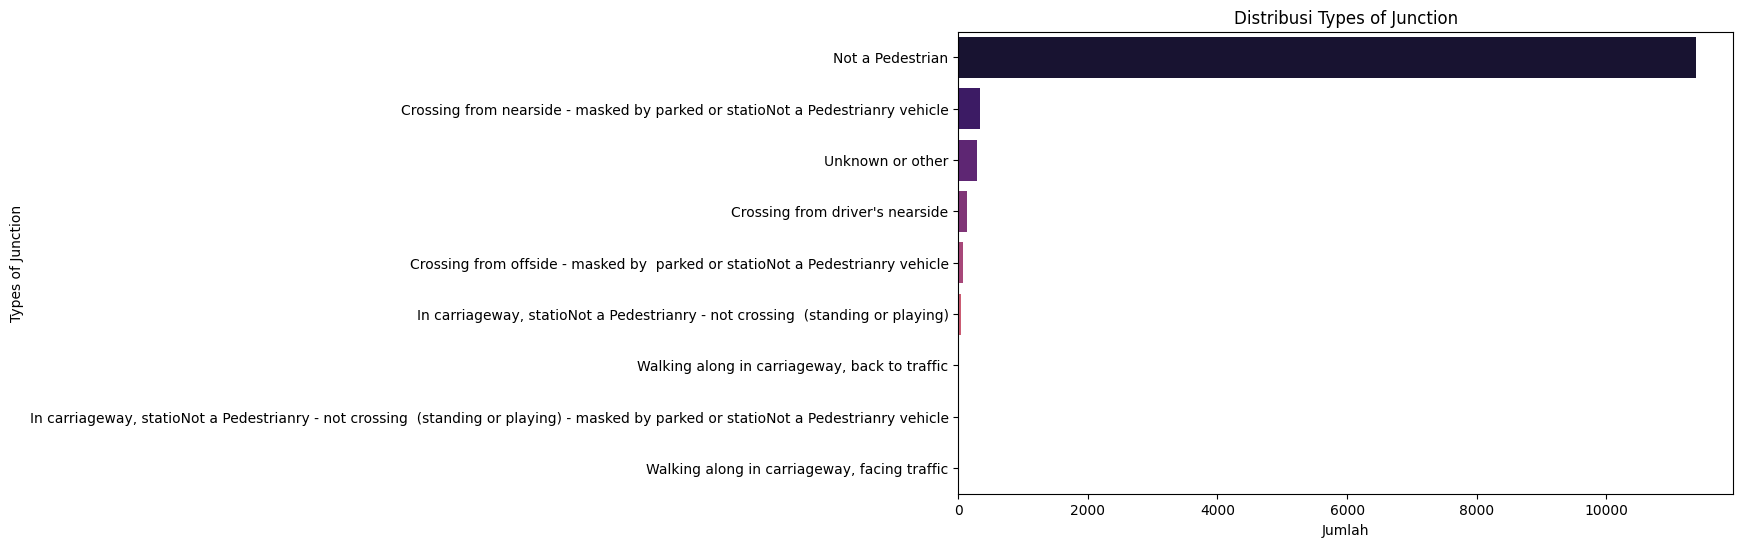

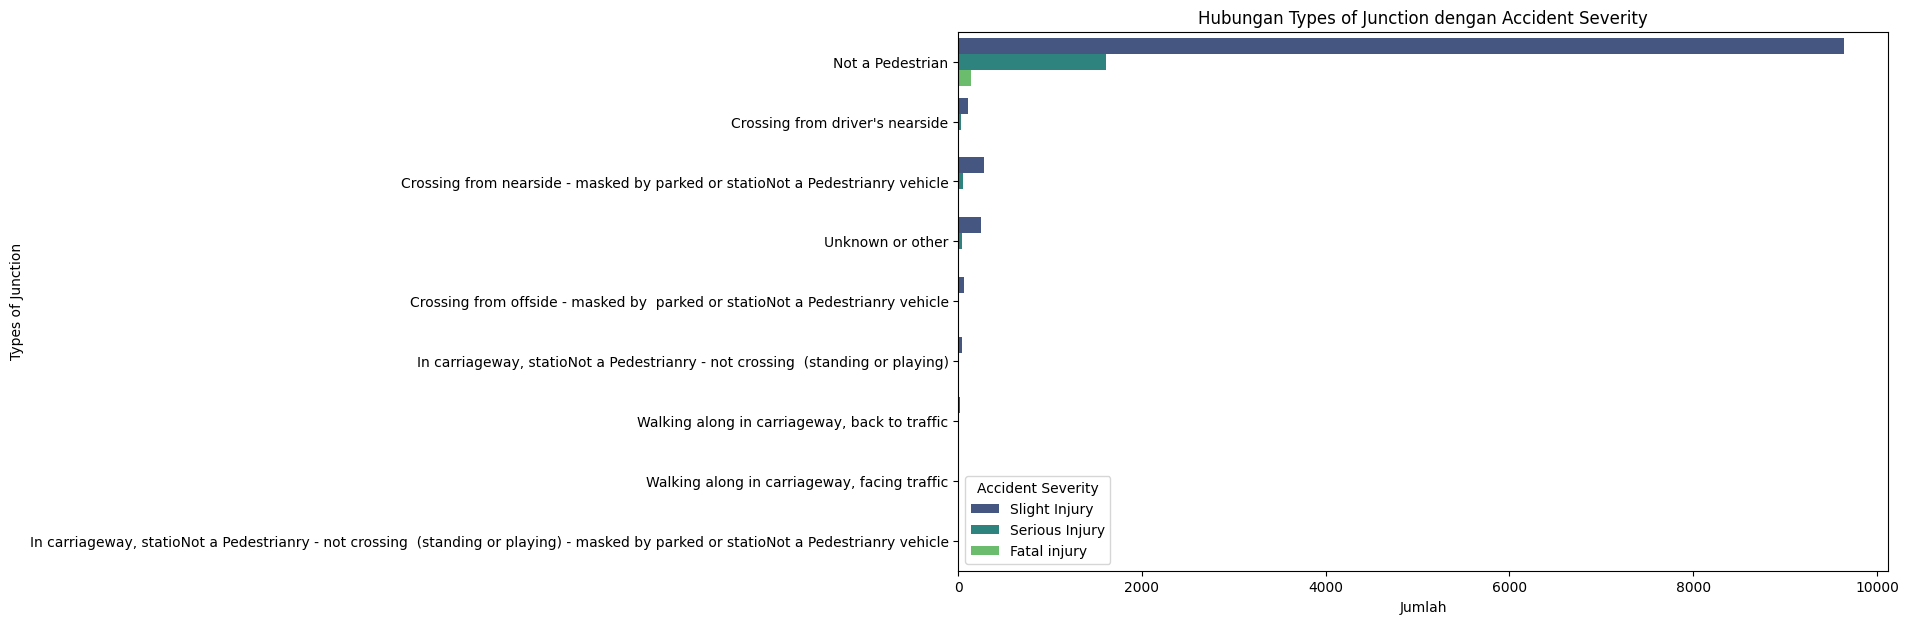

In [90]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df_prepro["Pedestrian_movement"], palette="magma", order=df_prepro["Pedestrian_movement"].value_counts().index)
plt.title("Distribusi Types of Junction")
plt.xlabel("Jumlah")
plt.ylabel("Types of Junction")
plt.show()


plt.figure(figsize=(12, 7))

sns.countplot(y=df_prepro["Pedestrian_movement"], hue=df_prepro["Accident_severity"], palette="viridis")
plt.title("Hubungan Types of Junction dengan Accident Severity")
plt.xlabel("Jumlah")
plt.ylabel("Types of Junction")
plt.legend(title="Accident Severity")
plt.show()


In [91]:
df_prepro

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Private Vehicle,Owner,Above 10yr,...,Going straight,na,na,18-30,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public Transport,Owner,5-10yrs,...,Going straight,na,na,18-30,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Commercial Vehicle,Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public Transport,Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Private Vehicle,Owner,5-10yrs,...,Going straight,na,na,18-30,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Commercial Vehicle,Owner,NaN,...,Going straight,na,na,18-30,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Private Vehicle,Owner,NaN,...,Other,na,na,18-30,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Public Transport,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Commercial Vehicle,Owner,2-5yrs,...,Other,na,na,18-30,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [92]:
import pandas as pd


temp_column = df_prepro["Pedestrian_movement"].astype(str).str.strip().str.replace(r"\s+", " ", regex=True)

# Mapping ulang kategori pakai replace biar lebih stabil
pedestrian_mapping = {
    "Crossing from nearside - masked by parked or stationary vehicle": "Crossing - masked by vehicle",
    "Crossing from offside - masked by parked or stationary vehicle": "Crossing - masked by vehicle",
    "Walking along in carriageway, facing traffic": "Walking along carriageway",
    "Walking along in carriageway, back to traffic": "Walking along carriageway",
    "In carriageway, stationary - not crossing (standing or playing)": "Stationary - not crossing",
    "In carriageway, stationary - not crossing (standing or playing) - masked by parked or stationary vehicle": "Stationary - masked by vehicle"
}

temp_column = temp_column.replace(pedestrian_mapping)

# Tangani nilai NaN dan "na" (ganti dengan modus)
mode_value = temp_column[temp_column != "na"].mode()[0]
temp_column = temp_column.replace(["na", "None"], mode_value)

# Simpan kembali ke DataFrame
df_prepro["Pedestrian_movement"] = temp_column

# Cek hasil akhirnya
print(temp_column.unique())


['Not a Pedestrian' "Crossing from driver's nearside"
 'Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle'
 'Unknown or other'
 'Crossing from offside - masked by parked or statioNot a Pedestrianry vehicle'
 'In carriageway, statioNot a Pedestrianry - not crossing (standing or playing)'
 'Walking along carriageway'
 'In carriageway, statioNot a Pedestrianry - not crossing (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle']


In [93]:
df_prepro["Pedestrian_movement"].unique()

array(['Not a Pedestrian', "Crossing from driver's nearside",
       'Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle',
       'Unknown or other',
       'Crossing from offside - masked by parked or statioNot a Pedestrianry vehicle',
       'In carriageway, statioNot a Pedestrianry - not crossing (standing or playing)',
       'Walking along carriageway',
       'In carriageway, statioNot a Pedestrianry - not crossing (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle'],
      dtype=object)

# cause

In [94]:
print(df_prepro['Cause_of_accident'].value_counts())
print(df_prepro['Cause_of_accident'].isna().sum())

contingency_table = pd.crosstab(df_prepro['Cause_of_accident'], df_prepro['Accident_severity'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("Kesimpulan: Ada hubungan signifikan antara Cause_of_accident dan Accident_severity.")
else:
    print("Kesimpulan: Tidak ada hubungan signifikan antara Cause_of_accident dan Accident_severity.")


Cause_of_accident
No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Improper parking                          25
Unknown                                   25
Name: count, dtype: int64
0
Accident_severity                     Fatal injury  Se

In [95]:
cause_grouping = {
    "No distancing": "No Distance",
    "No priority to vehicle": "Priority Violation",
    "No priority to pedestrian": "Priority Violation",
    "Changing lane to the right": "Unsafe Lane Change",
    "Changing lane to the left": "Unsafe Lane Change",
    "Driving to the left": "Unsafe Lane Change",
    "Driving at high speed": "Speeding",
    "Overspeed": "Speeding",
    "Overloading": "Overloading",
    "Improper parking": "Improper Parking/Exit",
    "Getting off the vehicle improperly": "Improper Parking/Exit",
    "Driving carelessly": "Driving carelessly",
    "Overtaking": "Speeding",
    "Overturning": "Reckless Driving",
    "Turnover": "Unsafe Lane Change",
    "Driving under the influence of drugs": "DUI (Drugs/Alcohol)",
    "Drunk driving": "DUI (Drugs/Alcohol)",
    "Other": "Other",
    "Unknown": "Unknown"
}

df_prepro['Cause_of_accident'] = df_prepro['Cause_of_accident'].replace(cause_grouping)

unique_cause_of_accident = df_prepro['Cause_of_accident'].unique()
unique_cause_of_accident

df_prepro['Cause_of_accident'].fillna(df_prepro['Cause_of_accident'].mode()[0], inplace=True)


/tmp/ipykernel_7331/3214940513.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prepro['Cause_of_accident'].fillna(df_prepro['Cause_of_accident'].mode()[0], inplace=True)


/tmp/ipykernel_7331/2082276730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_prepro["Cause_of_accident"], palette="magma", order=df_prepro["Cause_of_accident"].value_counts().index)


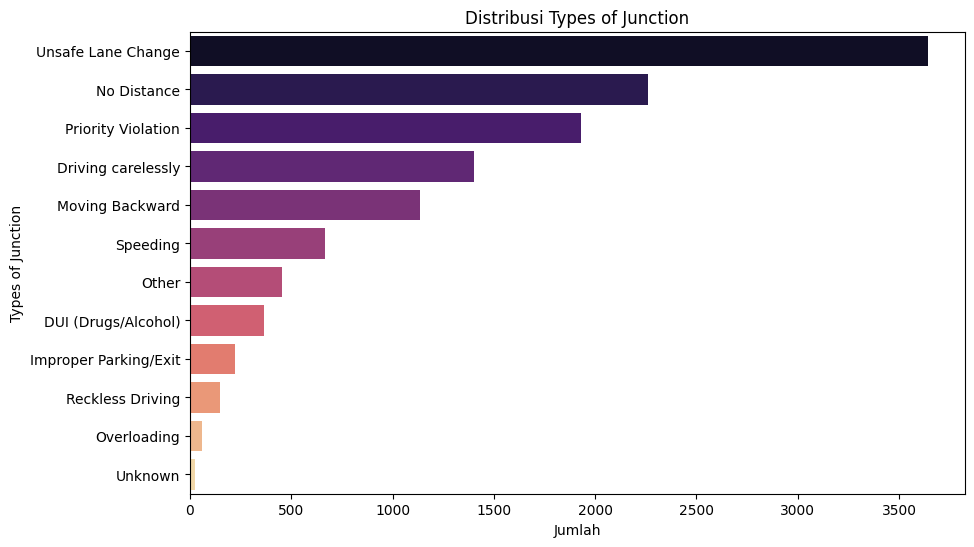

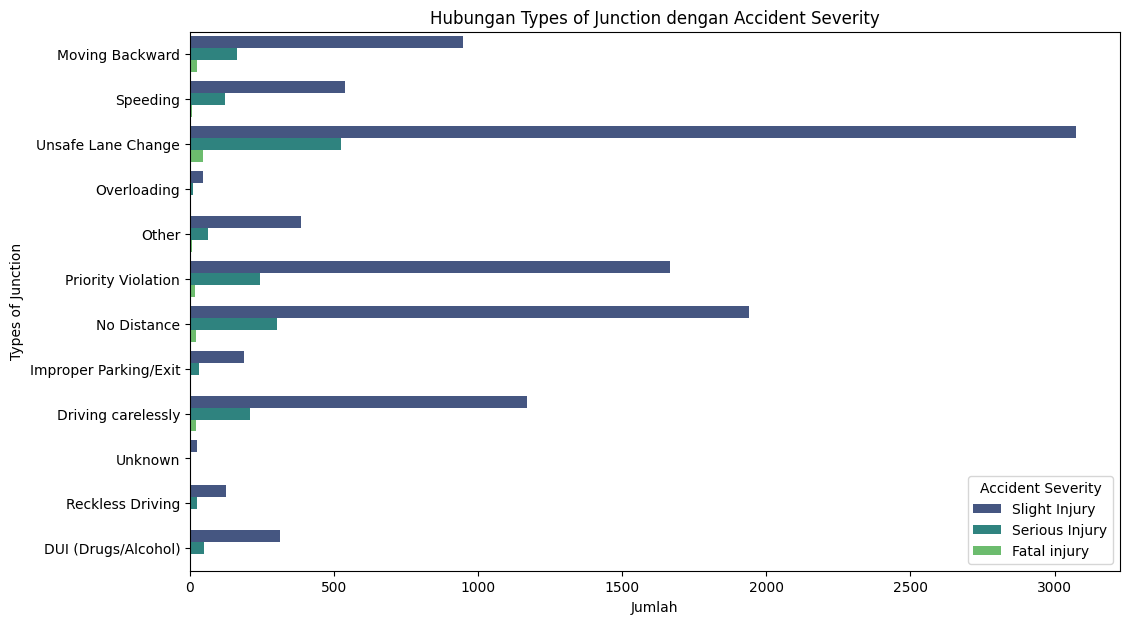

In [96]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df_prepro["Cause_of_accident"], palette="magma", order=df_prepro["Cause_of_accident"].value_counts().index)
plt.title("Distribusi Types of Junction")
plt.xlabel("Jumlah")
plt.ylabel("Types of Junction")
plt.show()


plt.figure(figsize=(12, 7))

sns.countplot(y=df_prepro["Cause_of_accident"], hue=df_prepro["Accident_severity"], palette="viridis")
plt.title("Hubungan Types of Junction dengan Accident Severity")
plt.xlabel("Jumlah")
plt.ylabel("Types of Junction")
plt.legend(title="Accident Severity")
plt.show()


In [97]:

kolom_dihapus = ['Work_of_casuality', 'Fitness_of_casuality', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Pedestrian_movement']

df_prepro.drop(columns=kolom_dihapus, inplace=True)

print(df_prepro)


           Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
1      17:02:00      Monday              31-50          Male   
2      17:02:00      Monday              18-30          Male   
3       1:06:00      Sunday              18-30          Male   
4       1:06:00      Sunday              18-30          Male   
...         ...         ...                ...           ...   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee         Above 10yr   
2      Junior h

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

def fatal_palette(df, positions_to_change: list):
    """
    Create a grey-red palette according to the inputs.
    Highlights specific indices in red.
    """
    palette = ['#96898b'] * len(df)  
    for position in positions_to_change:
        if 0 <= position < len(df):  
            palette[position] = '#cc253b'  #
    return sns.color_palette(palette)

def fatal_plot(i, column, red_list, order=None, custom_labels=None, subplot=True, sort=False):
    """
    Plot charts using df_prepro and fatal_palette.
    Used to plot values in a column against the fatality frequency.
    """
    if subplot:
        plt.subplot(2, 3, i)
    
    df_counts = df_prepro[column].value_counts(normalize=True).reset_index()
    df_counts.columns = [column, 'ratio']  

    sns.barplot(
        data=df_counts,
        x=column, y='ratio',  
        palette=fatal_palette(df_counts, red_list),
     order=order
    )

    if custom_labels is not None:
        plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)
        
    plt.xticks(rotation=45)
    plt.xlabel(column, fontsize=14, color='#425169')
    plt.ylabel('Fatality ratio', fontsize=14, color='#425169')
    
    ax = plt.gca()
    ax.spines[['bottom', 'left', 'top', 'right']].set_color('#425169')
    ax.spines[['bottom', 'left', 'top', 'right']].set_linewidth(1)



In [99]:
# sns.set_style('darkgrid')
# plt.figure(figsize=(15, 8))
# plt.suptitle("Fatal injury ratio by Category", fontsize=17, color='#2c4369')

# # Ambil semua kolom kategorikal dari dataframe
# categorical_columns = df_prepro.select_dtypes(include=['object', 'category']).columns

# # Loop untuk membuat subplot secara otomatis
# for i, col in enumerate(categorical_columns, start=1):
#     fatal_plot(i, col, red_list=[-1, -2])  # Sesuaikan jika perlu


# plt.subplots_adjust(left=0.1, right=1, bottom=0.1, top=0.9, wspace=0.4, hspace=0.7)
# plt.show()


In [100]:
df_prepro.to_csv('../datasets/rta_Cleanfix.csv',index=False)